# The purpose of this code is review visualization in Random forest algorithm.

In [19]:
import os
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import decimal
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [17]:
df0 = pd.read_csv('titanic.csv')
df0

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [20]:
df = df0.drop(columns = ["Name"])
warnings.filterwarnings("ignore")

list_of_features_string = ['Sex']

transformer = make_column_transformer(
    (OneHotEncoder(), list_of_features_string),
    remainder='passthrough')

transformer_one_hot = transformer.fit_transform(df)
transformer_one_hot_df = pd.DataFrame(transformer_one_hot, columns=transformer.get_feature_names())
transformer_one_hot_df

,onehotencoder__x0_female,onehotencoder__x0_male,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,1.0,0.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...
882,0.0,1.0,0.0,2.0,27.0,0.0,0.0,13.0000
883,1.0,0.0,1.0,1.0,19.0,0.0,0.0,30.0000
884,1.0,0.0,0.0,3.0,7.0,1.0,2.0,23.4500
885,0.0,1.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [21]:
X_new = transformer_one_hot_df.drop(columns = ["Survived"])
y_new = transformer_one_hot_df["Survived"]

In [22]:
X_train, X_test,y_train, y_test = train_test_split(X_new,y_new, test_size=0.2, shuffle=True)

In [36]:
RF_classifer = RandomForestClassifier(max_depth=3, random_state=0)

In [37]:
fitted_RF = RF_classifer.fit(X_train, y_train)

In [38]:
y_predicted = fitted_RF.predict(X_test)

In [39]:
first_prediction = accuracy_score(y_test, y_predicted)
print(first_prediction)

0.848314606741573


In [41]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=900)
tree.plot_tree(RF_classifer.estimators_[0])

[Text(0.5, 0.875, 'X[0] <= 0.5\ngini = 0.493\nsamples = 450\nvalue = [395, 314]'),
 Text(0.25, 0.625, 'X[3] <= 8.5\ngini = 0.373\nsamples = 283\nvalue = [327, 108]'),
 Text(0.125, 0.375, 'X[6] <= 29.062\ngini = 0.375\nsamples = 18\nvalue = [7, 21]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [0, 13]'),
 Text(0.1875, 0.125, 'gini = 0.498\nsamples = 9\nvalue = [7, 8]'),
 Text(0.375, 0.375, 'X[6] <= 26.269\ngini = 0.336\nsamples = 265\nvalue = [320, 87]'),
 Text(0.3125, 0.125, 'gini = 0.226\nsamples = 189\nvalue = [248, 37]'),
 Text(0.4375, 0.125, 'gini = 0.484\nsamples = 76\nvalue = [72, 50]'),
 Text(0.75, 0.625, 'X[5] <= 1.5\ngini = 0.373\nsamples = 167\nvalue = [68, 206]'),
 Text(0.625, 0.375, 'X[3] <= 32.5\ngini = 0.286\nsamples = 129\nvalue = [36, 172]'),
 Text(0.5625, 0.125, 'gini = 0.375\nsamples = 77\nvalue = [31, 93]'),
 Text(0.6875, 0.125, 'gini = 0.112\nsamples = 52\nvalue = [5, 79]'),
 Text(0.875, 0.375, 'X[3] <= 37.5\ngini = 0.5\nsamples = 38\nvalue = [32, 34]'),

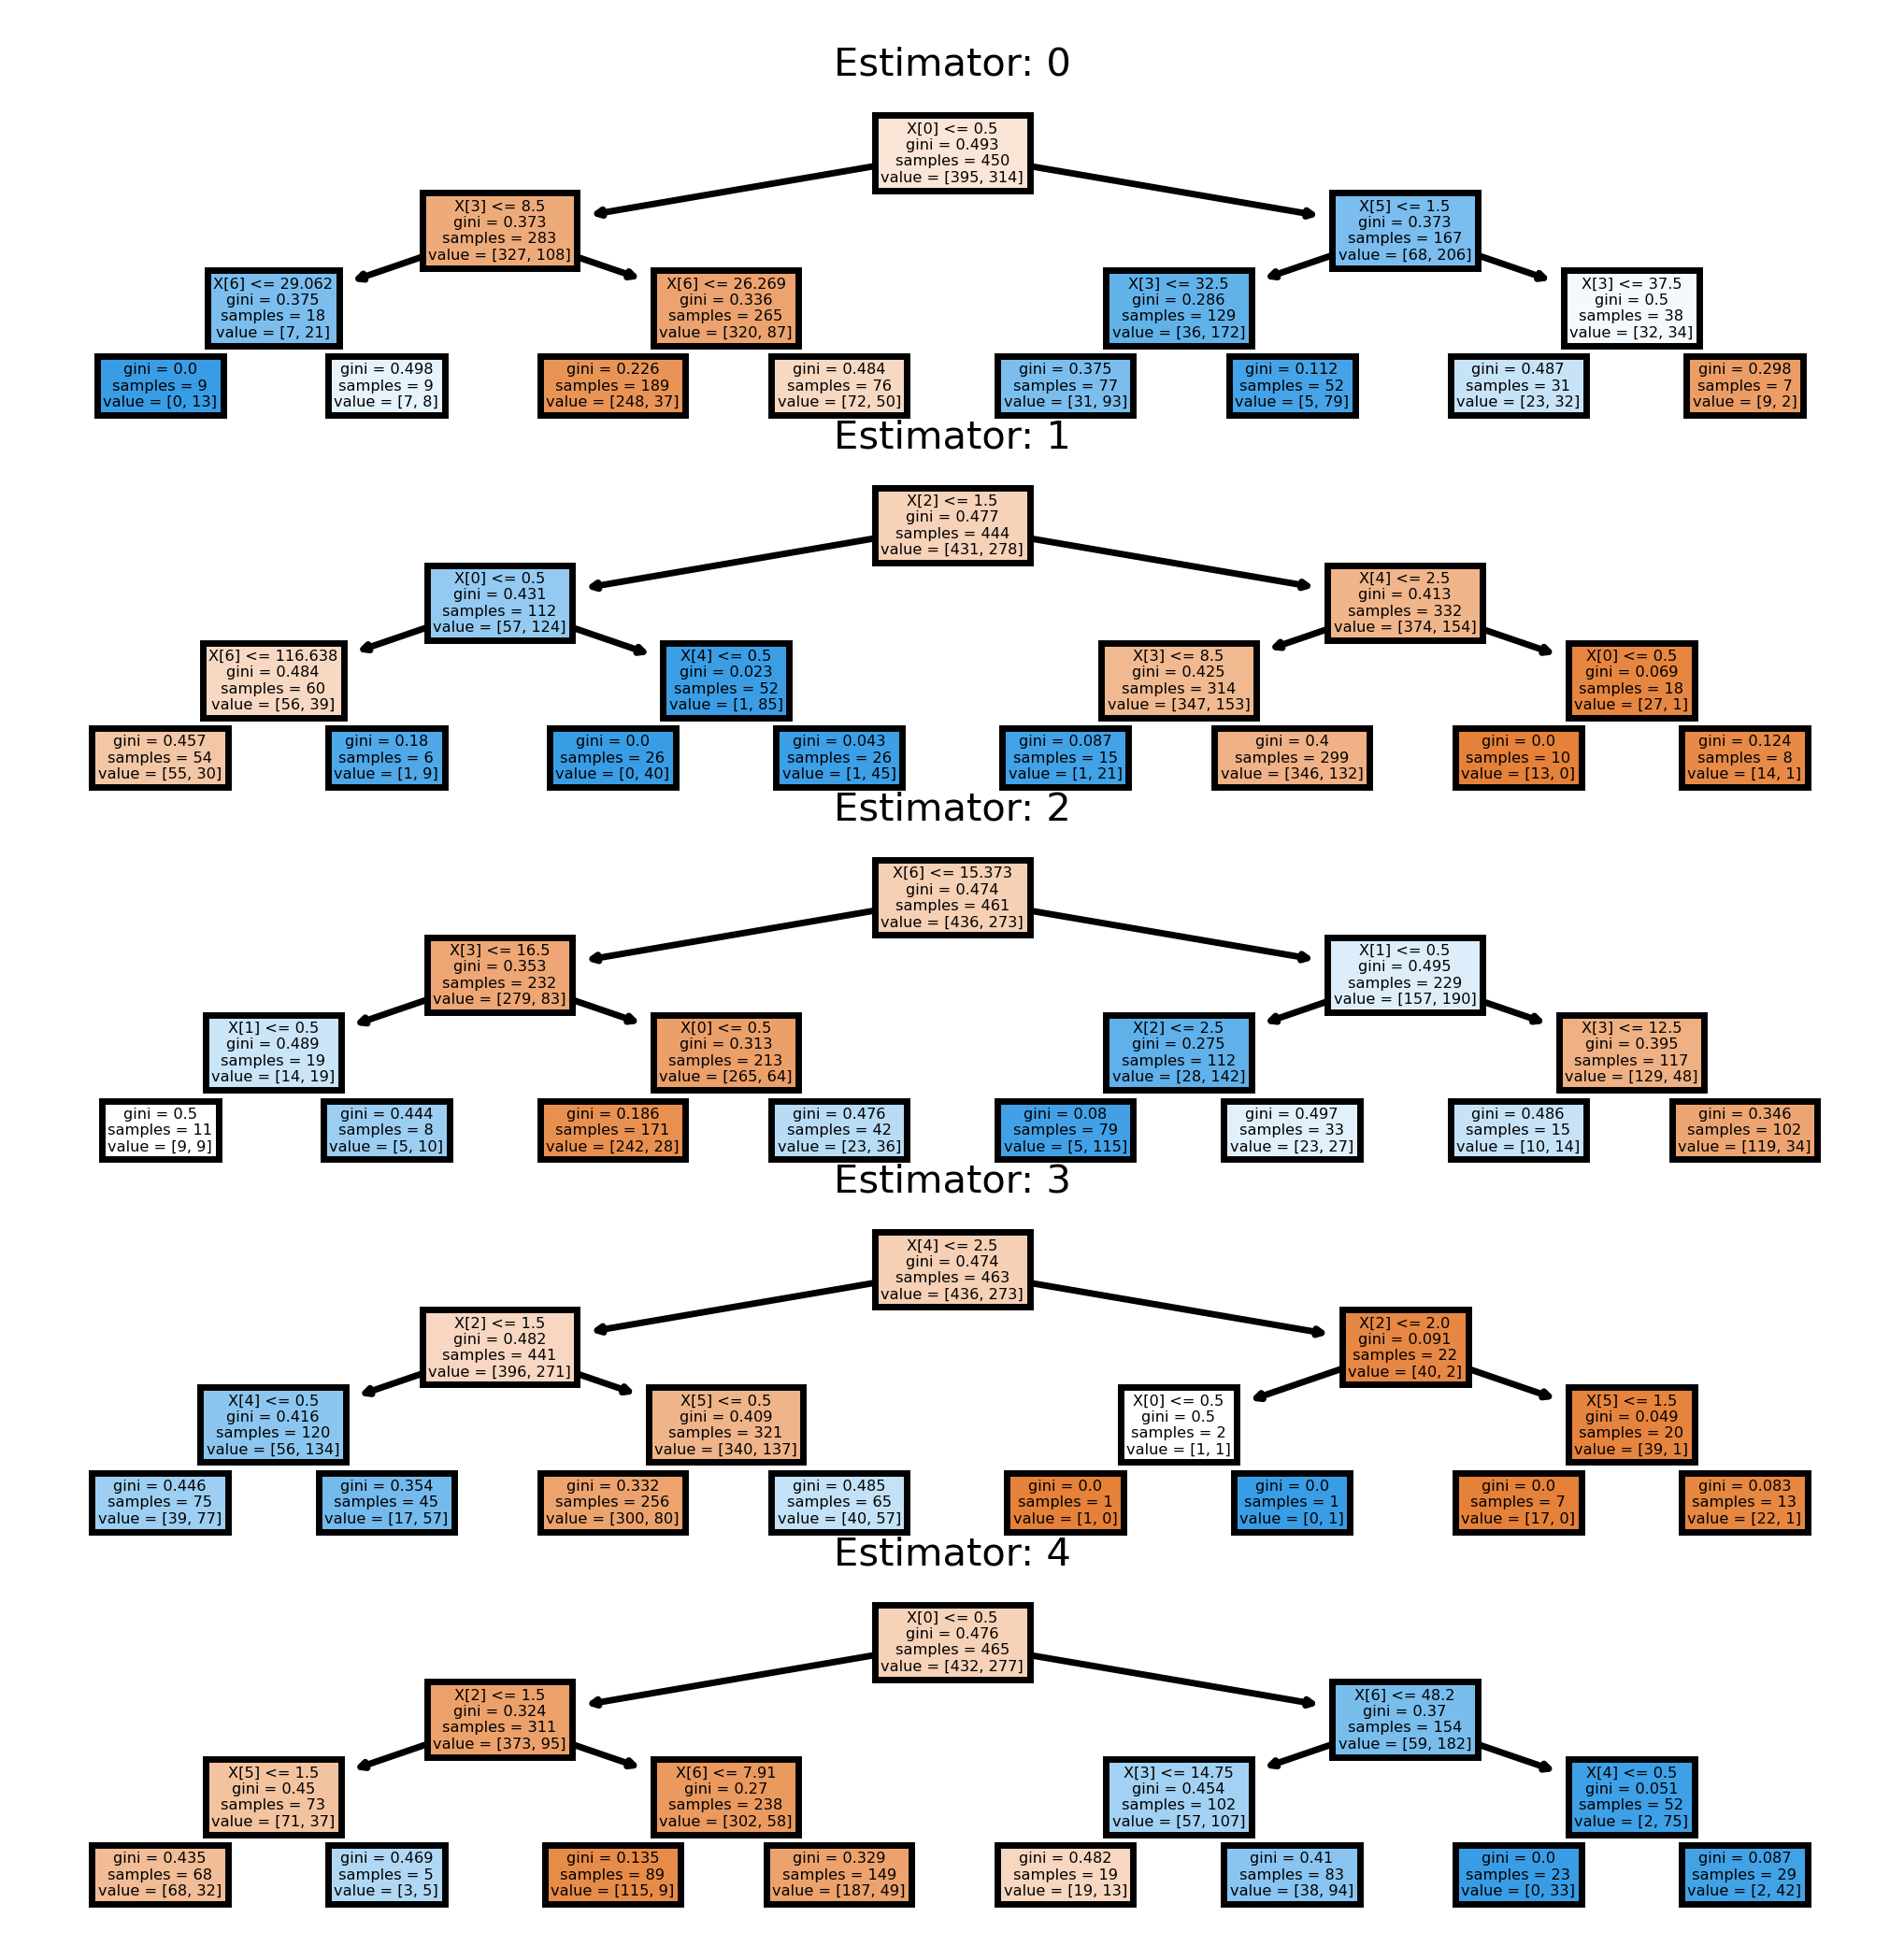

In [54]:
fig, axes = plt.subplots(nrows = 5,ncols = 1,figsize = (5,5), dpi=500)
for index in range(0, 5):
    tree.plot_tree(RF_classifer.estimators_[index],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 6)
fig.savefig('rf_5trees.png')